# TASK A3 Result

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [2]:
from modules.helper import *
info = {}
info['projectPath'] = os.getcwd()
info['targetPath'] = "SOO_targets/DP1000_room_SwiftVoce_NDBR50_curve1"
info['resultPath'] = "SOO_results/DP1000_room_SwiftVoce_NDBR50_curve1"

In [3]:
# Add column force,N to the target curve
# Create new dataframe
df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
targetCurve = pd.read_csv(f"{info['targetPath']}/FD_Curve.csv")
df['displacement/mm'] = targetCurve['displacement/mm']
df['force/kN'] = targetCurve['force/N'] * 1e-3
df['force/N'] = targetCurve['force/N']
df.to_csv(f"{info['targetPath']}/FD_Curve.csv",index=False)

# Initial guess simulations

[0.0, 0.0310005, 0.0620038, 0.0929936, 0.124006, 0.155041, 0.186012, 0.216989, 0.247965, 0.278893, 0.309818, 0.340743, 0.371668, 0.402593, 0.433518, 0.464443, 0.495368, 0.526293, 0.557218, 0.588143, 0.619185, 0.650358, 0.68153, 0.712707, 0.74388, 0.775057, 0.806229, 0.837402, 0.868579, 0.899752, 0.930924, 0.962101, 0.993274, 1.02428, 1.05532, 1.08621, 1.11718, 1.14821, 1.17926, 1.2103, 1.24074, 1.27114, 1.30154, 1.33194, 1.36235, 1.39274, 1.42314, 1.45354, 1.48465, 1.51548, 1.54671, 1.57751, 1.60868, 1.63956, 1.6706, 1.70168, 1.73223, 1.76254, 1.79287, 1.82393, 1.85518, 1.88576, 1.91652, 1.94739, 1.97806, 2.00914, 2.0397, 2.0701, 2.10051, 2.13263, 2.16335, 2.19486, 2.22577, 2.25585, 2.28573, 2.31676, 2.34913, 2.38166, 2.41305, 2.44449, 2.4774, 2.51064, 2.54392, 2.5772, 2.60935, 2.64032, 2.67105, 2.70177, 2.73249, 2.76321, 2.79393, 2.82425, 2.85288, 2.88123, 2.90943, 2.93759, 2.96575, 2.99633, 3.03054, 3.0657, 3.10085]


ValueError: x and y must have same first dimension, but have shapes (101,) and (999,)

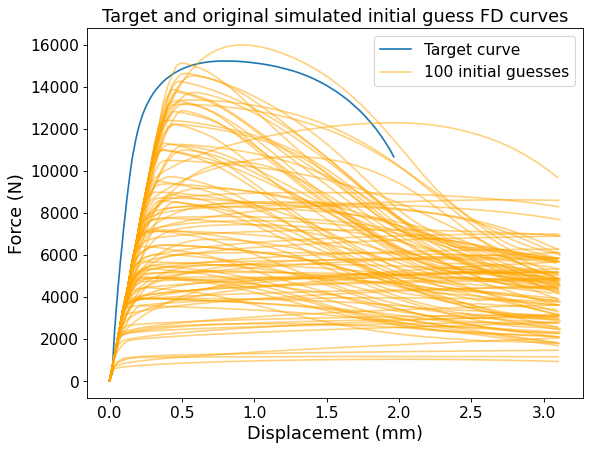

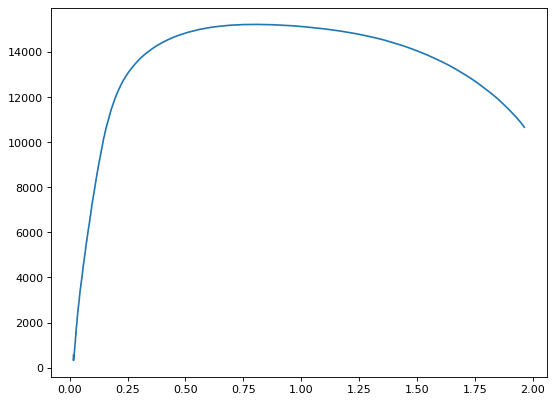

In [4]:
resultPath = info['resultPath']
targetPath = info['targetPath']
# Load csv file
target = pd.read_csv(f"{targetPath}/FD_Curve.csv")
expForce = target['force/N'].to_numpy()
expDisplacement = target['displacement/mm'].to_numpy() 
#print(max(expDisplacement))
targetCurve = {}
targetCurve['displacement'] = expDisplacement
targetCurve['force'] = expForce

initial_original_FD_Curves = np.load(f"{resultPath}/initial/common/FD_Curves.npy", allow_pickle=True).tolist()
initial_interpolated_FD_Curves = interpolating_FD_Curves(initial_original_FD_Curves, targetCurve)
print(list(initial_interpolated_FD_Curves.values())[0]['displacement'])

fontsize = 14
# print(maxDisp)
# Plotting all FD curves

# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Target curve')
for param in initial_original_FD_Curves:
    plt.plot(initial_original_FD_Curves[param]['displacement'], initial_original_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
numberOfInitialSims = len(initial_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfInitialSims} initial guesses')
plt.title('Target and original simulated initial guess FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)


figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Target curve')
for param in initial_interpolated_FD_Curves:
    plt.plot(initial_interpolated_FD_Curves[param]['displacement'], initial_interpolated_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
numberOfInitialSims = len(initial_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfInitialSims} initial guesses')
plt.title('Target and interpolated simulated initial guess FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

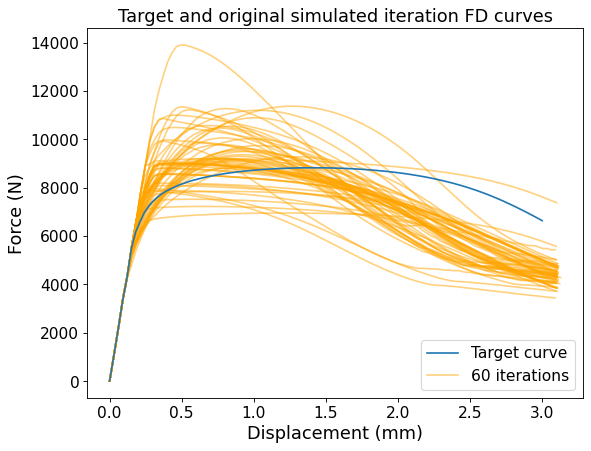

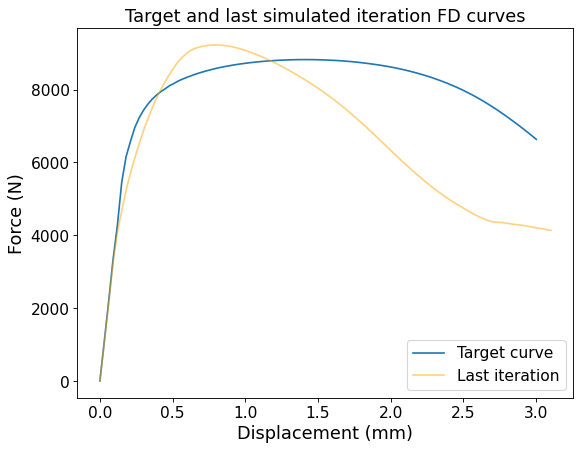

In [5]:
fontsize = 14

# Do the same like cell above but for iteration
# Plotting all FD curves

iteration_original_FD_Curves = np.load(f"{resultPath}/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()
figure(figsize=(8, 6), dpi=80)

for param in iteration_original_FD_Curves:
    plt.plot(iteration_original_FD_Curves[param]['displacement'], iteration_original_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot(expDisplacement, expForce, label='Target curve')

numberOfIterations = len(iteration_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfIterations} iterations')
plt.title('Target and original simulated iteration FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)

iteration_interpolated_FD_Curves = interpolating_FD_Curves(iteration_original_FD_Curves, targetCurve)

# Do the same like cell above but for iteration
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)

iter = -1

last_iteration_interpolated_displacement = list(iteration_interpolated_FD_Curves.values())[iter]['displacement']
last_iteration_interpolated_force = list(iteration_interpolated_FD_Curves.values())[iter]['force']

plt.plot(expDisplacement, expForce, label='Target curve')
plt.plot(last_iteration_interpolated_displacement, last_iteration_interpolated_force, color='orange', alpha=0.5)
plt.plot([],[], color='orange', alpha=0.5, label='Last iteration')
plt.title('Target and last simulated iteration FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)

No iterations satisfy the 3% deviation stop criterion
[]


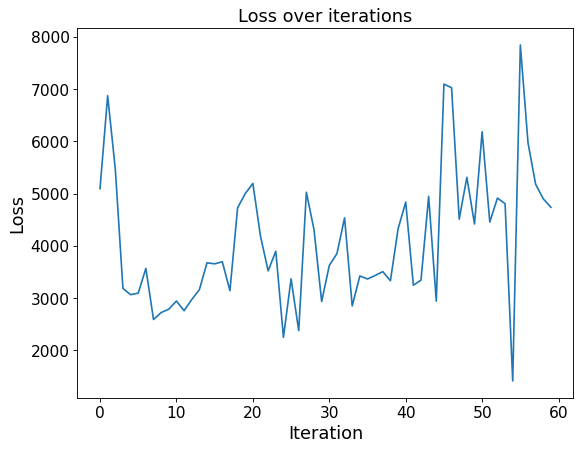

In [6]:
# Plotting error over iterations
from modules.stoploss import *

deviationPercent = 3
iteration_errors = []
stop_check = []

iteration_interpolated_FD_Curves = interpolating_FD_Curves(iteration_original_FD_Curves, targetCurve)

iter = 1
for param in iteration_original_FD_Curves:
    iteration_errors.append(lossFD(iteration_interpolated_FD_Curves[param]['displacement'], iteration_interpolated_FD_Curves[param]['force'], expForce))
    if stopFD(expForce, iteration_interpolated_FD_Curves[param]['force'], deviationPercent):
        stop_check.append(iter)
    iter += 1

if np.any(len(stop_check)) == 0:
    print(f"No iterations satisfy the {deviationPercent}% deviation stop criterion")
else:
    print(f"Iterations that satisfy the stop criterion: {stop_check}")

figure(figsize=(8, 6), dpi=80)

fontsize=14
plt.plot(iteration_errors, label='Error')
plt.title('Loss over iterations', fontsize=fontsize+2)
#plt.xlim([-1, len(iteration_errors)])
plt.xlabel('Iteration', fontsize=fontsize+2)
plt.ylabel('Loss', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
print(stop_check)


# Create animations

In [7]:
import imageio
fontsize = 12

# Do the same like cell above but for iteration
# Plotting all FD curves

iteration_original_FD_Curves = np.load(f"{resultPath}/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()

numberOfIterations = len(iteration_original_FD_Curves)

for iter in range(numberOfIterations):
    figure(figsize=(8, 6), dpi=80)

    last_iteration_interpolated_displacement = list(iteration_interpolated_FD_Curves.values())[iter]['displacement']
    last_iteration_interpolated_force = list(iteration_interpolated_FD_Curves.values())[iter]['force']

    plt.plot(expDisplacement, expForce, label='Target curve')
    plt.plot(last_iteration_interpolated_displacement, last_iteration_interpolated_force, color='orange', alpha=0.5)
    plt.plot([],[], color='orange', alpha=0.5, label=f'Iteration {iter + 1}')
    plt.title('Target and last simulated iteration FD curves', fontsize=fontsize+2)
    plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
    plt.ylabel('Force (N)', fontsize=fontsize+2)
    plt.ylim([-500, 12000])
    plt.xlim([-0.1, 3.5])
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize, loc=4)

    plt.savefig(f'notebooks/iteration_evolution/A2_results/iter_{iter+1}.png', 
        transparent = False,  
        facecolor = 'white'
        )
    plt.close()

frames = []
for iter in range(numberOfIterations):
    image = imageio.v2.imread(f'notebooks/iteration_evolution/A2_results/iter_{iter+1}.png')
    frames.append(image)

imageio.mimsave(f'notebooks/iteration_evolution/A2_results.gif', 
                frames, 
                duration = 300,  # ms per image
                loop = 0
                )